# Noise2Void - 2D Example for SEM data

__Note:__ This notebook expects a trained model and will only work if you have executed the `01_training.ipynb` beforehand.

In [ ]:
!pip install tensorflow==2.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 33 kB/s 
     |████████████████████████████████| 2.9 MB 48.5 MB/s 
     |████████████████████████████████| 454 kB 65.7 MB/s 
     |████████████████████████████████| 3.0 MB 36.8 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uni

In [ ]:
%%bash
git clone https://github.com/microscopy-processing/n2v.git
cd n2v
pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/n2v
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Running setup.py develop for n2v


Cloning into 'n2v'...


In [ ]:
import sys
sys.path.append("n2v")

In [ ]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

## Load the Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir models
!mkdir models/n2v_2D

In [ ]:
!ls drive/Shareddrives/TomogramDenoising/notebooks/N2V/2D/SEM/

01_training.ipynb  02_prediction.ipynb	export.bioimage.io.zip


In [ ]:
!cp drive/Shareddrives/TomogramDenoising/notebooks/N2V/2D/SEM/export.bioimage.io.zip models/n2v_2D
!cp drive/Shareddrives/TomogramDenoising/notebooks/N2V/2D/SEM/config.json models/n2v_2D
#!mkdir data
#!cp drive/Shareddrives/TomogramDenoising/notebooks/N2V/2D/testinput.tif data/train.tif
#!cp drive/Shareddrives/TomogramDenoising/notebooks/N2V/2D/testoutput.tif data/validation.tif

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.  
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

/usr/local/lib/python3.7/dist-packages/csbdeep/models/base_model.py:162: UserWarning: Couldn't find any network weights (*.h5, *.hdf5) to load.
  warnings.warn("Couldn't find any network weights (%s) to load." % ', '.join(weights_ext))


In [ ]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [ ]:
# We load the data we want to process.
input_train = imread('data/train.tif')

# Here we process the data.
# The parameter 'n_tiles' can be used if images are to big for the GPU memory.
# If we do not provide the n_tiles' parameter the system will automatically try to find an appropriate tiling.
# This can take longer.
pred_train = model.predict(input_train, axes='YX', n_tiles=(2,1))

# We load and process the data we previously used for validation.
input_val = imread('data/validation.tif')
pred_val = model.predict(input_val, axes='YX')

100%|██████████| 2/2 [00:00<00:00, 29.42it/s]


### Show results on training data...

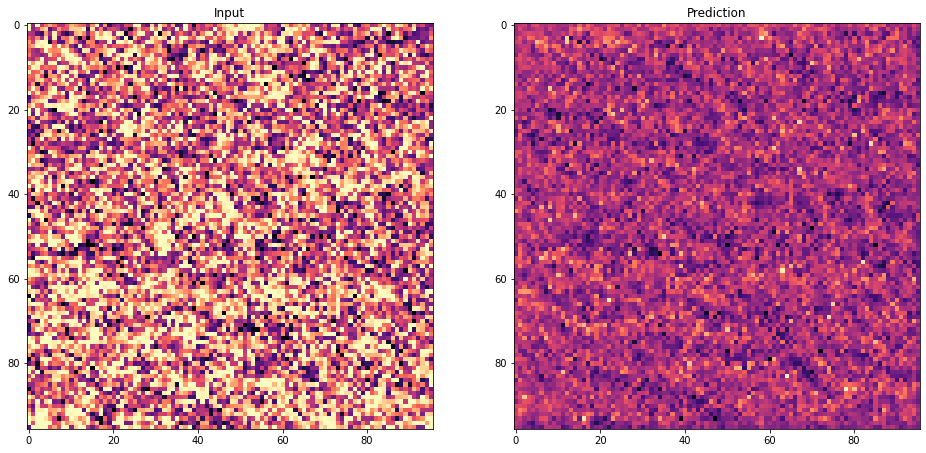

In [ ]:
# Let's look at the results.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_train[:1500:,:1500],cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_train[:1500,:1500],cmap="magma")
plt.title('Prediction');

### Show results on validation data...

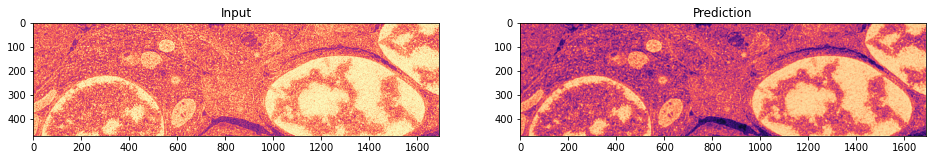

In [ ]:
# Let's look at the results.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_val,cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_val,cmap="magma")
plt.title('Prediction');

## Save Results

In [ ]:
save_tiff_imagej_compatible('pred_train.tif', pred_train, axes='YX')
save_tiff_imagej_compatible('pred_validation.tif', pred_val, axes='YX')